# Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the required libraries.

In [ ]:
from sklearn.cluster import KMeans, k_means #For clustering
from sklearn.decomposition import PCA # Linear Dimensionality reduction.

In [ ]:
df = pd.read_csv("/content/sales_data_sample.csv",encoding='latin1') #Loading the dataset.

## Preprocessing 

In [ ]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [ ]:
df.shape 

(2823, 25)

In [ ]:
df.describe()

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25%     2203.430000     2.000000     4.000000  2003.00000    68.000000  
50%     3184.800000     3.000000     8.000000  2004.00000    99.000000  
75%     4508.000000     4.000000    11.000000  2004.00000   124.000000  
max    14082.800000     4.000000    12.000000  2005.00000   214.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1) #Dropping the categorical uneccessary columns along with columns having null values. Can't fill the null values are there are alot of null values.

In [ ]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [ ]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [ ]:
df.duplicated( keep='first').sum()

0

In [ ]:
df.isna().sum() #finding missing values

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [ ]:
# Checking the categorical columns.

In [ ]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [ ]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [ ]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [ ]:
productline = pd.get_dummies(df['PRODUCTLINE']) #Converting the categorical columns. 
Dealsize = pd.get_dummies(df['DEALSIZE'])

In [ ]:
df = pd.concat([df,productline,Dealsize], axis = 1)

In [ ]:
df


QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES        ORDERDATE  \
0                  30      95.70                2  2871.00   2/24/2003 0:00   
1                  34      81.35                5  2765.90    5/7/2003 0:00   
2                  41      94.74                2  3884.34    7/1/2003 0:00   
3                  45      83.26                6  3746.70   8/25/2003 0:00   
4                  49     100.00               14  5205.27  10/10/2003 0:00   
...               ...        ...              ...      ...              ...   
2818               20     100.00               15  2244.40   12/2/2004 0:00   
2819               29     100.00                1  3978.51   1/31/2005 0:00   
2820               43     100.00                4  5417.57    3/1/2005 0:00   
2821               34      62.24                1  2116.16   3/28/2005 0:00   
2822               47      65.52                9  3079.44    5/6/2005 0:00   

      QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  ... Classic Cars  \
0          1         2     2003  Motorcycles    95  ...            0   
1          2         5     2003  Motorcycles    95  ...            0   
2          3         7     2003  Motorcycles    95  ...            0   
3          3         8     2003  Motorcycles    95  ...            0   
4          4        10     2003  Motorcycles    95  ...            0   
...      ...       ...      ...          ...   ...  ...          ...   
2818       4        12     2004        Ships    54  ...            0   
2819       1         1     2005        Ships    54  ...            0   
2820       1         3     2005        Ships    54  ...            0   
2821       1         3     2005        Ships    54  ...            0   
2822       2         5     2005        Ships    54  ...            0   

     Motorcycles Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  \
0              1      0      0       0                 0             0      0   
1              1      0      0       0                 0             0      0   
2              1      0      0       0                 0             0      0   
3              1      0      0       0                 0             0      0   
4              1      0      0       0                 0             0      0   
...          ...    ...    ...     ...               ...           ...    ...   
2818           0      0      1       0                 0             0      0   
2819           0      0      1       0                 0             0      0   
2820           0      0      1       0                 0             0      0   
2821           0      0      1       0                 0             0      0   
2822           0      0      1       0                 0             0      0   

      Medium  Small  
0          0      1  
1          0      1  
2          1      0  
3          1      0  
4          1      0  
...      ...    ...  
2818       0      1  
2819       1      0  
2820       1      0  
2821       0      1  
2822       1      0  

[2823 rows x 23 columns]

In [ ]:
df_drop  = ['COUNTRY','PRODUCTLINE','DEALSIZE'] #Dropping Country too as there are alot of countries. 
df = df.drop(df_drop, axis=1)

In [ ]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes #Converting the datatype.

In [ ]:
df.drop('ORDERDATE', axis=1, inplace=True) #Dropping the Orderdate as Month is already included.

In [ ]:
df.dtypes #All the datatypes are converted into numeric

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Classic Cars          uint8
Motorcycles           uint8
Planes                uint8
Ships                 uint8
Trains                uint8
Trucks and Buses      uint8
Vintage Cars          uint8
Large                 uint8
Medium                uint8
Small                 uint8
dtype: object

### Plotting the Elbow Plot to determine the number of clusters. 

In [ ]:
# before we implement the k-means and assign the centers of our data, we can also make a quick analyze to 

# find the optimal number (centers) of clusters using Elbow Method.

# Elbow Method is one of the most popular methods to determine this optimal value of k.

# Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used. 
# Inertia: It is the sum of squared distances of samples to their closest cluster center.

# The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or 
# the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

# The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. 
# The means are commonly called the cluster centroids.

# The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

In [ ]:
kmeanModel

KMeans(n_clusters=9)

In [ ]:
kmeanModel.cluster_centers_

array([[ 3.41590909e+01,  8.47332386e+01,  6.65530303e+00,
         2.92099246e+03,  2.69886364e+00,  7.01515152e+00,
         2.00379545e+03,  9.40397727e+01,  6.12272727e+01,
         2.70833333e-01,  1.23106061e-01,  1.57196970e-01,
         1.40151515e-01,  2.27272727e-02,  1.02272727e-01,
         1.83712121e-01,  1.38777878e-17,  3.95833333e-01,
         6.04166667e-01],
       [ 4.42650602e+01,  9.98509036e+01,  5.83734940e+00,
         6.87044193e+03,  2.74096386e+00,  7.19277108e+00,
         2.00384940e+03,  1.45096386e+02,  3.39879518e+01,
         5.42168675e-01,  1.08433735e-01,  9.03614458e-02,
         2.40963855e-02,  6.02409639e-03,  1.26506024e-01,
         1.02409639e-01,  4.03614458e-01,  5.96385542e-01,
         6.66133815e-16],
       [ 3.09756554e+01,  7.38021348e+01,  6.80337079e+00,
         2.17799822e+03,  2.73408240e+00,  7.13857678e+00,
         2.00380524e+03,  7.99400749e+01,  6.38651685e+01,
         2.30337079e-01,  1.27340824e-01,  1.21722846e-01,
    

In [ ]:
kmeanModel.inertia_

# The lower values of inertia are better and zero is optimal.

# We can see that the model has very high inertia. So, this is not a good model fit to the data.

236703997.7551382

In [ ]:
# check how many of the samples were correctly labeled

label = kmeanModel.labels_

In [ ]:
label

array([5, 5, 8, ..., 7, 4, 5], dtype=int32)

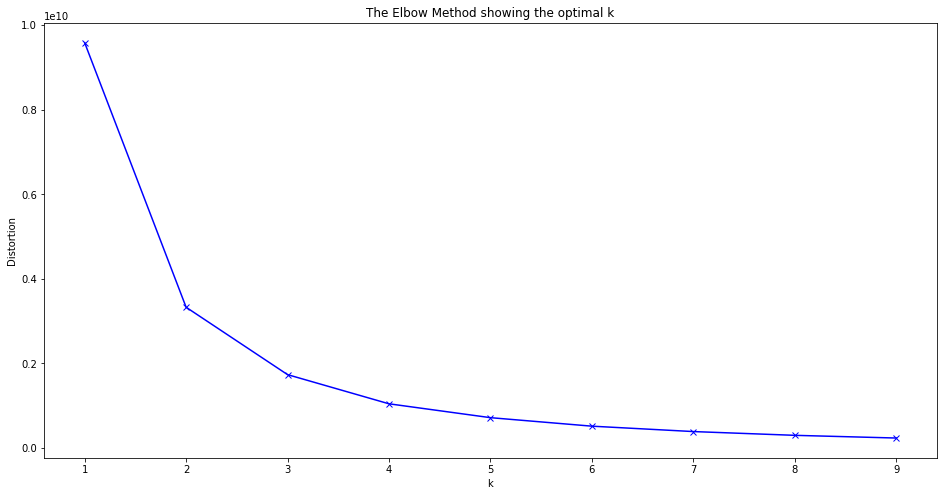

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## As the number of k increases Inertia decreases. 
## Observations: A Elbow can be observed at 3 and after that the curve decreases gradually. 

In [ ]:
X_train = df.values #Returns a numpy array.

In [ ]:
X_train.shape

(2823, 19)

In [ ]:
model = KMeans(n_clusters=3,random_state=2) #Number of cluster = 3
model = model.fit(X_train) #Fitting the values to create a model.
predictions = model.predict(X_train) #Predicting the cluster values (0,1,or 2)

In [ ]:
predictions

#3 clusters within 0, 1, and 2 numbers. We can also merge the result of the clusters with our original data table like this:

array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
unique,counts = np.unique(predictions,return_counts=True)

In [ ]:
unique

array([0, 1, 2], dtype=int32)

In [ ]:
counts

array([1083, 1367,  373])

In [ ]:
counts = counts.reshape(1,3)   # 1 row and 3 column

In [ ]:
counts

array([[1083, 1367,  373]])

In [ ]:
counts_df = pd.DataFrame(counts,columns=['Cluster1','Cluster2','Cluster3'])

In [ ]:
counts_df.head()

Cluster1  Cluster2  Cluster3
0      1083      1367       373

## Visualization 

In [ ]:
pca = PCA(n_components=2) #Converting all the features into 2 columns to make it easy to visualize using Principal COmponent Analysis.

In [ ]:
reduced_X = pd.DataFrame(pca.fit_transform(X_train),columns=['PCA1','PCA2']) #Creating a DataFrame.

In [ ]:
reduced_X.head()

PCA1       PCA2
0  -682.488323 -42.819535
1  -787.665502 -41.694991
2   330.732170 -26.481208
3   193.040232 -26.285766
4  1651.532874  -6.891196

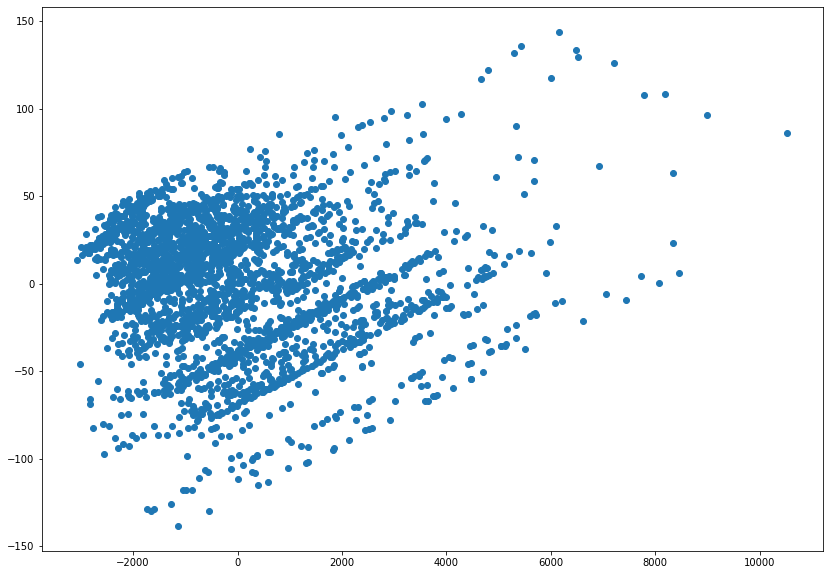

In [ ]:
#Plotting the normal Scatter Plot
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])

In [ ]:
model.cluster_centers_ #Finding the centriods. (3 Centriods in total. Each Array contains a centroids for particular feature )

array([[ 3.72031394e+01,  9.52120960e+01,  6.44967682e+00,
         4.13868425e+03,  2.72022161e+00,  7.09879963e+00,
         2.00379409e+03,  1.13248384e+02,  5.04469067e+01,
         3.74884580e-01,  1.15420129e-01,  9.41828255e-02,
         8.21791320e-02,  1.84672207e-02,  1.16343490e-01,
         1.98522622e-01,  2.08166817e-17,  1.00000000e+00,
        -3.38618023e-15],
       [ 3.08302853e+01,  7.00755230e+01,  6.67300658e+00,
         2.12409474e+03,  2.71762985e+00,  7.09509876e+00,
         2.00381127e+03,  7.84784199e+01,  6.24871982e+01,
         2.64813460e-01,  1.21433797e-01,  1.29480614e-01,
         1.00219459e-01,  3.87710315e-02,  9.21726408e-02,
         2.53108998e-01,  6.93889390e-18,  6.21799561e-02,
         9.37820044e-01],
       [ 4.45871314e+01,  9.98931099e+01,  5.75603217e+00,
         7.09596863e+03,  2.71045576e+00,  7.06434316e+00,
         2.00389008e+03,  1.45823056e+02,  3.14959786e+01,
         5.33512064e-01,  1.07238606e-01,  7.23860590e-02,
    

In [ ]:
reduced_centers = pca.transform(model.cluster_centers_) #Transforming the centroids into 3 in x and y coordinates

In [ ]:
reduced_centers

array([[ 5.84994044e+02, -4.36786931e+00],
       [-1.43005891e+03,  2.60041009e+00],
       [ 3.54247180e+03,  3.15185487e+00]])

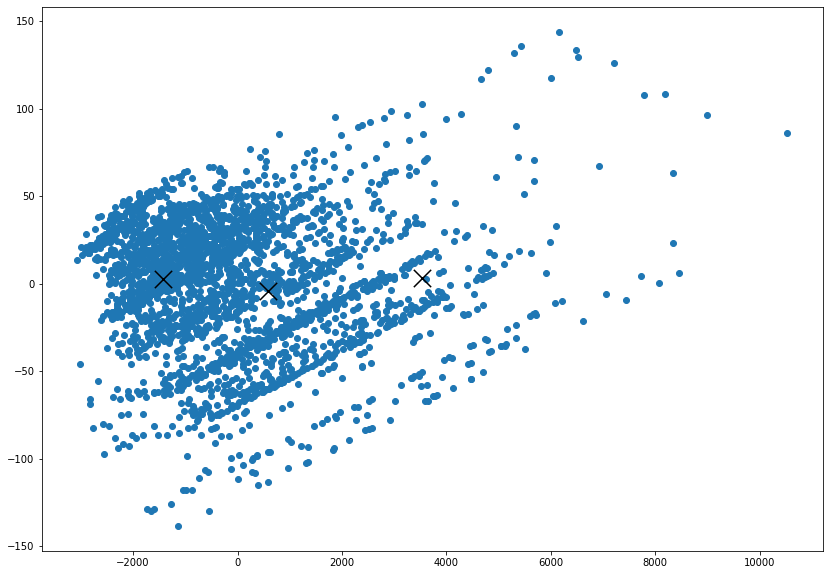

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300) #Plotting the centriods

In [ ]:
reduced_X['Clusters'] = predictions #Adding the Clusters to the reduced dataframe.

In [ ]:
reduced_X.head()

PCA1       PCA2  Clusters
0  -682.488323 -42.819535         1
1  -787.665502 -41.694991         1
2   330.732170 -26.481208         0
3   193.040232 -26.285766         0
4  1651.532874  -6.891196         0

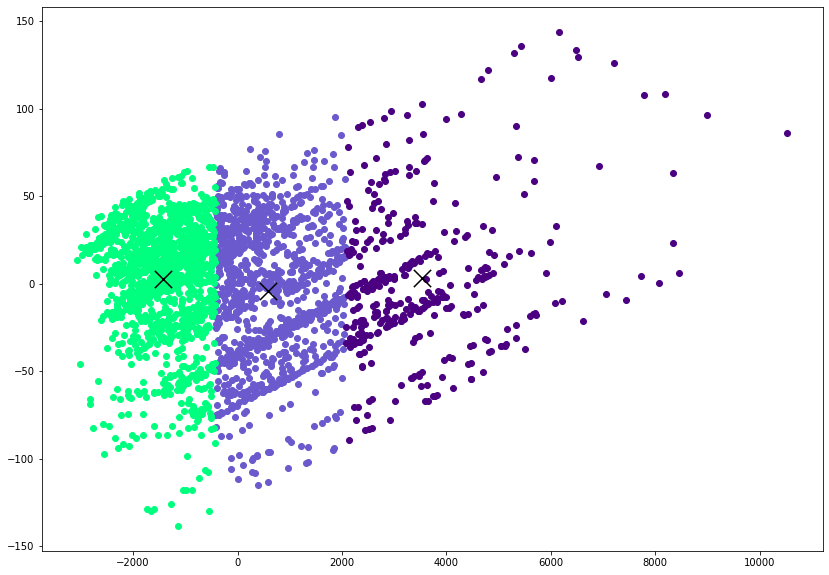

In [ ]:
#Plotting the clusters 
plt.figure(figsize=(14,10))
#                     taking the cluster number and first column           taking the same cluster number and second column      Assigning the color
plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA2'],color='slateblue')
plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA2'],color='springgreen')
plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA2'],color='indigo')


plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)